# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [2]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [1]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [10]:
# Step 1: Set Up Parameters

# Location coordinates for New York City
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-01-01'
end_date = '2023-01-07'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [11]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

response = requests.get(base_url, params=params)


In [12]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [92]:
# Step 3: Load Data into pandas DataFrame
#Converting API response to a Python dictionary:
data = response.json()

#Extracting the 'hourly' section: 
hourly_data = data['hourly']
#This usually gives you another dictionary where each key is a variable, like 'temperature', 'precipitation', 'humidity', 'windspeed', etc.
#Converting it to a DataFrame:
df = pd.DataFrame(hourly_data)
df.head()


,time,precipitation
0,2022-01-01T00:00,0.0
1,2022-01-01T01:00,0.0
2,2022-01-01T02:00,0.0
3,2022-01-01T03:00,0.0
4,2022-01-01T04:00,0.0


In [19]:
# Hover at data 

In [15]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [16]:
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill


C:\Users\patid\AppData\Local\Temp\ipykernel_20908\1928920962.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [18]:
df

,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01 00:00:00,10.7,99,1.0
2023-01-01 01:00:00,10.5,99,1.0
2023-01-01 02:00:00,10.4,98,0.1
2023-01-01 03:00:00,10.3,96,0.0
2023-01-01 04:00:00,9.7,95,0.0
...,...,...,...
2023-01-07 19:00:00,4.3,60,0.0
2023-01-07 20:00:00,3.8,64,0.0
2023-01-07 21:00:00,3.3,66,0.0


In [17]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,168.000000,168.000000,168.000000
mean,8.371429,86.422619,0.142857
std,3.495063,12.799933,0.436037
min,0.400000,45.000000,0.000000
25%,5.900000,81.000000,0.000000
50%,8.250000,90.500000,0.000000
75%,11.100000,97.000000,0.000000
max,17.900000,100.000000,3.100000


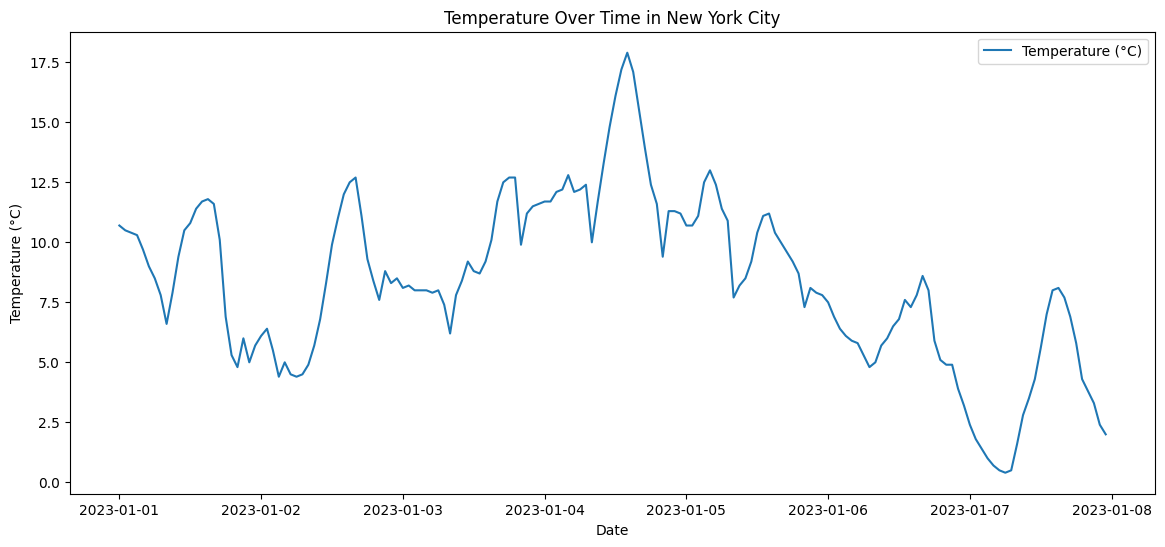

In [11]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

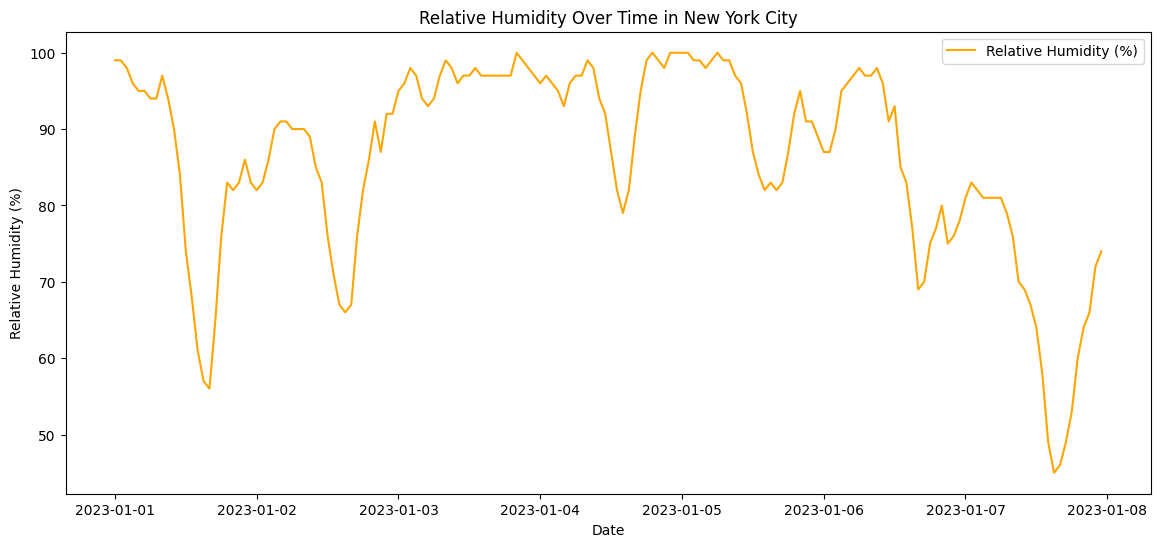

In [12]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


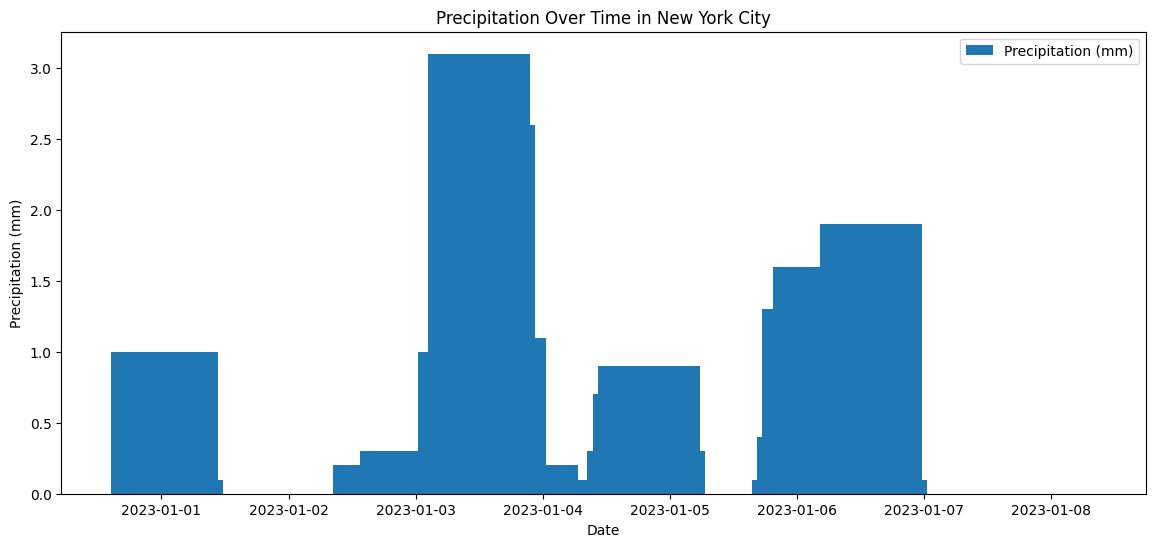

In [13]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [14]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: 0.24


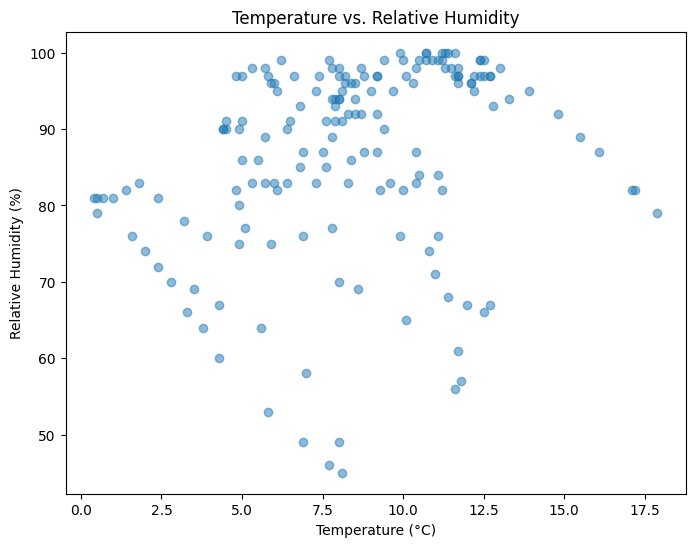

In [15]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [16]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
daily_avg.head()


,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01,8.850000,83.708333,0.087500
2023-01-02,7.775000,83.458333,0.020833
2023-01-03,9.408333,96.875000,0.395833
2023-01-04,12.995833,94.166667,0.095833
2023-01-05,9.916667,92.666667,0.000000


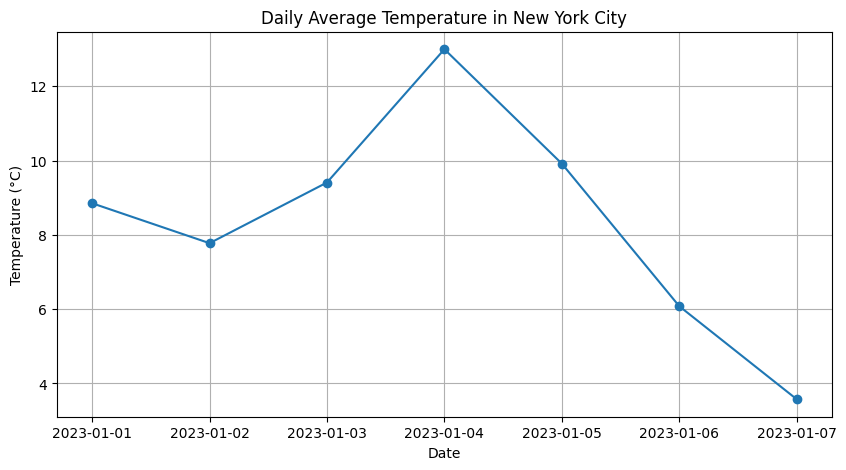

In [17]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [18]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)

# Load and clean Los Angeles data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)
df_la.fillna(method='ffill', inplace=True)


/tmp/ipykernel_12210/4259999984.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_la.fillna(method='ffill', inplace=True)


In [19]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()


In [20]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'New York': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})


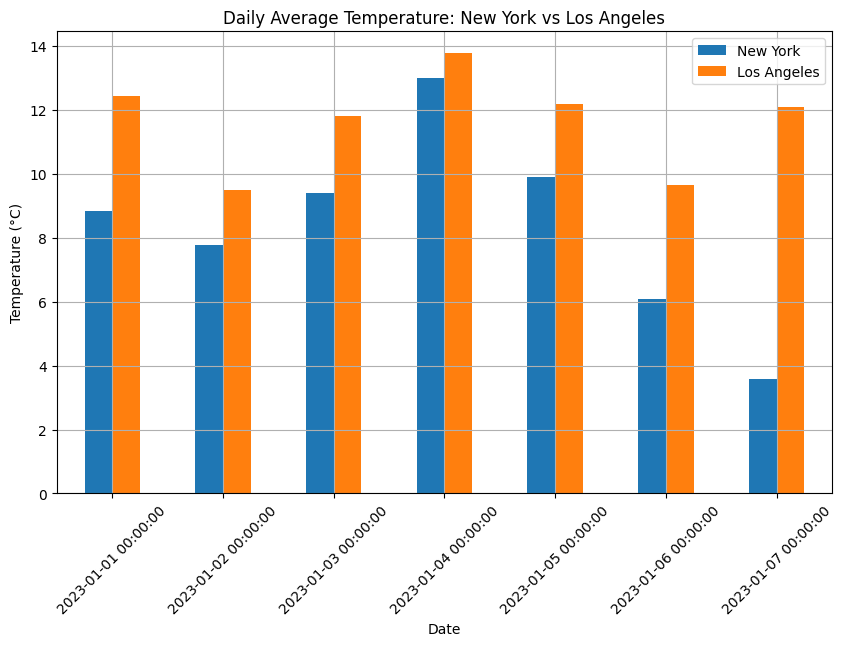

In [21]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: New York vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [22]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Los Angeles'] - combined_temp['New York']
combined_temp


,New York,Los Angeles,Temp Difference
time,,,
2023-01-01,8.850000,12.433333,3.583333
2023-01-02,7.775000,9.483333,1.708333
2023-01-03,9.408333,11.808333,2.400000
2023-01-04,12.995833,13.766667,0.770833
2023-01-05,9.916667,12.183333,2.266667
2023-01-06,6.079167,9.662500,3.583333
2023-01-07,3.575000,12.095833,8.520833


In [23]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df.to_csv('new_york_weather.csv')

# Save Los Angeles data
df_la.to_csv('los_angeles_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **New York City** and **Los Angeles**.

---

**Next Steps**:

- **Extend the Date Range**: Analyze seasonal trends by fetching data over several months.
- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.


## Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!


#### I followed following steps to Compare Rainfall/Precipitation Between London and Seattleto
- Step 1: Set Up Parameters for Europe/London location
- Step 2: Make the API Request
     * Check if the request was successful
- Sep 3: Load Data into pandas DataFrame
- Step 4: Data Cleaning
    * Check for missing values
    * Handle missing values (if any)
- Step 5: Exploratory Data Analysis
    * Summary Statistics
    * Plot Precipitaion Over Time
- Step 6: Resample Weekly to Weekly Averages
    * Plot Weekly Average Precipitation
    * Followed same steps for Los Angeles (LA)
- Step 7: Combine DataFrames for Comparison
- Step 8: Plot Comparison of weekly precipitation
- Step 9: Save Data to CSV (Optional)



In [118]:
#  Step 1: Set Up Parameters for Europe/London location
# Location coordinates for "Europe/London"
#Hourly Weather Variables :"precipitation"

latitude =  51.5074
longitude =  -0.1278

# Date range
start_date = "2022-01-01"
end_date = "2022-12-31"  # One year of data

# Variables to fetch
hourly_variables = ['precipitation']

In [119]:
# Step 2: Make the API Request
base_url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": latitude,
	"longitude": longitude ,
	"start_date": start_date,
	"end_date": end_date,
	"hourly": hourly_variables,
	"timezone": "Europe/London"
}
responses = requests.get(base_url, params=params)

In [120]:
# Check if the request was successful

if response.status_code == 200:
    print("Data fetched Successfully!")
else:
    print(f'Failed to fetch data. status code: {response.status_code}')

Data fetched Successfully!


In [121]:
# Step 3: Load Data into pandas DataFrame
data = responses.json()
hourly_data = data['hourly']
df_lo = pd.DataFrame(hourly_data)
df_lo.head()

,time,precipitation
0,2022-01-01T00:00,0.0
1,2022-01-01T01:00,0.0
2,2022-01-01T02:00,0.0
3,2022-01-01T03:00,0.0
4,2022-01-01T04:00,0.0


In [122]:
# as precipitation column showing only 0 so checked data >0
df_lo[df_lo['precipitation']>0]

,time,precipitation
15,2022-01-01T15:00,0.2
30,2022-01-02T06:00,0.1
39,2022-01-02T15:00,1.0
40,2022-01-02T16:00,0.6
41,2022-01-02T17:00,0.1
...,...,...
8752,2022-12-31T16:00,0.5
8753,2022-12-31T17:00,0.2
8754,2022-12-31T18:00,0.2
8755,2022-12-31T19:00,0.2


In [124]:
# Step 4: Data Cleaning
df_lo['time'] = pd.to_datetime(df_lo['time'])

In [125]:
df_lo.set_index('time',inplace= True)

In [126]:
# Check for missing values
df_lo.isnull().sum()

precipitation    0
dtype: int64

In [127]:
# Handle missing values (if any)
df_lo.fillna(method = 'ffill', inplace = True)

C:\Users\patid\AppData\Local\Temp\ipykernel_20908\997203148.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_lo.fillna(method = 'ffill', inplace = True)


In [128]:
df_lo

,precipitation
time,
2022-01-01 00:00:00,0.0
2022-01-01 01:00:00,0.0
2022-01-01 02:00:00,0.0
2022-01-01 03:00:00,0.0
2022-01-01 04:00:00,0.0
...,...
2022-12-31 19:00:00,0.2
2022-12-31 20:00:00,0.0
2022-12-31 21:00:00,0.0


In [129]:
# Step 5: Exploratory Data Analysis
# Summary Statistics
df_lo.describe()

,precipitation
count,8760.000000
mean,0.075662
std,0.404500
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,14.700000


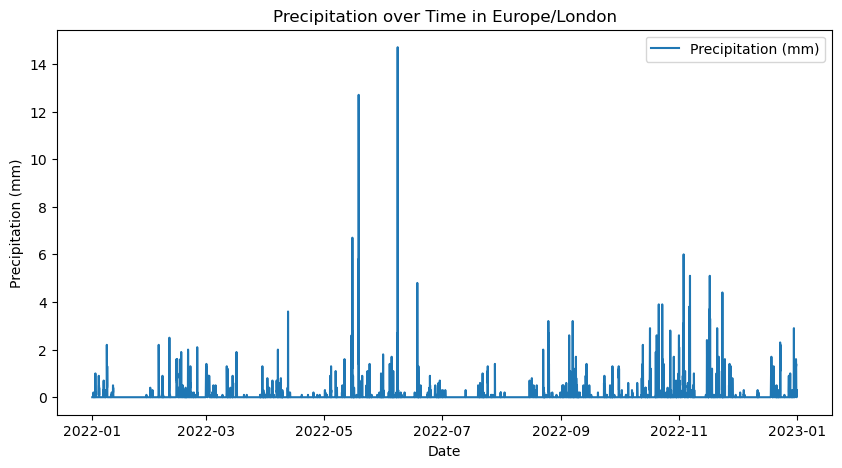

In [130]:
# Plot Precipitaion Over Time
plt.figure(figsize =(10,5))
plt.plot(df_lo.index, df_lo['precipitation'],label = 'Precipitation (mm)')
plt.title("Precipitation over Time in Europe/London")
plt.xlabel("Date")
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [131]:
# Step 7: Resample Weekly to Weekly Averages
weekly_avg = df_lo.resample('W').mean()
weekly_avg.head()

,precipitation
time,
2022-01-02,0.045833
2022-01-09,0.076786
2022-01-16,0.018452
2022-01-23,0.000000
2022-01-30,0.000595


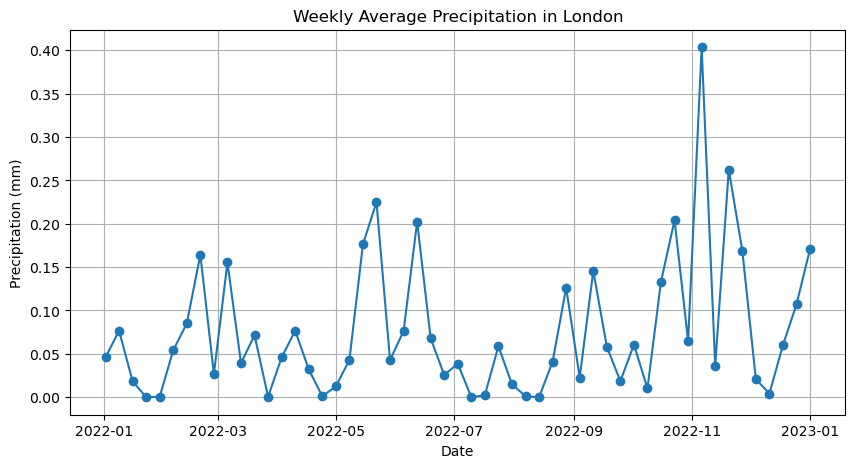

In [132]:
# Plot Weekly Average Precipitation
plt.figure(figsize =(10,5))
plt.plot(weekly_avg.index , weekly_avg['precipitation'], marker= 'o')
plt.title('Weekly Average Precipitation in London')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.show()
         

In [133]:
# Coordinates for Los Angeles
latitude: 47.6062
longitude: -122.3321
# Date Range one year
start_date: "2022-01-01"
end_date: "2022-12-31"
hourly_variable = ['precipitation']

In [134]:
#Compare with Another Location (Los Angeles)
# Make the API Request
base_url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": latitude ,
	"longitude": longitude,
	"start_date": start_date,
	"end_date": end_date,
	"hourly": hourly_variable,
	"timezone": "America/Los_Angeles"
}
response = requests.get(base_url, params=params)

In [135]:
# Check if the request was successful
if response.status_code == 200:
    print('Data fetched Successfully!')
else:
    print(f'Failed to fetch data.status code:{reponse.status_code}')
    

Data fetched Successfully!


In [89]:
# hover at data look for column name 

In [136]:
# Load Data into pandas DataFrame

data = response.json()  #Converting API response to a Python dictionary:now data is a dictionary (like a JSON object).
hourly_data = data['hourly'] #Extracting the 'hourly' section:
df_la = pd.DataFrame(hourly_data) #This usually gives you another dictionary where key is a variable 'precipitation'.
df_la.head()

,time,precipitation
0,2022-01-01T00:00,0.0
1,2022-01-01T01:00,0.0
2,2022-01-01T02:00,0.0
3,2022-01-01T03:00,0.0
4,2022-01-01T04:00,0.0


In [137]:
df

,precipitation
time,
2022-01-01 00:00:00,0.0
2022-01-01 01:00:00,0.0
2022-01-01 02:00:00,0.0
2022-01-01 03:00:00,0.0
2022-01-01 04:00:00,0.0
...,...
2022-12-31 19:00:00,0.0
2022-12-31 20:00:00,0.0
2022-12-31 21:00:00,0.0


In [138]:
#: Data Cleaning
# Convert 'time' column to datetime

df_la['time'] = pd.to_datetime(df_la['time'])
# Set 'time' as the index
df_la.set_index('time', inplace = True)
# Check for missing values
df_la.isnull().sum()

precipitation    0
dtype: int64

In [139]:
# Handle missing values (if any)
df_la.fillna(method = 'ffill', inplace = True) # forword fill

C:\Users\patid\AppData\Local\Temp\ipykernel_20908\2475884880.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_la.fillna(method = 'ffill', inplace = True) # forword fill


In [140]:
df_la

,precipitation
time,
2022-01-01 00:00:00,0.0
2022-01-01 01:00:00,0.0
2022-01-01 02:00:00,0.0
2022-01-01 03:00:00,0.0
2022-01-01 04:00:00,0.0
...,...
2022-12-31 19:00:00,0.0
2022-12-31 20:00:00,0.0
2022-12-31 21:00:00,0.0


In [141]:
# Exploratory Data Analysis
# Summary Statistics
df_la.describe()

,precipitation
count,8760.000000
mean,0.075753
std,0.404520
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,14.700000


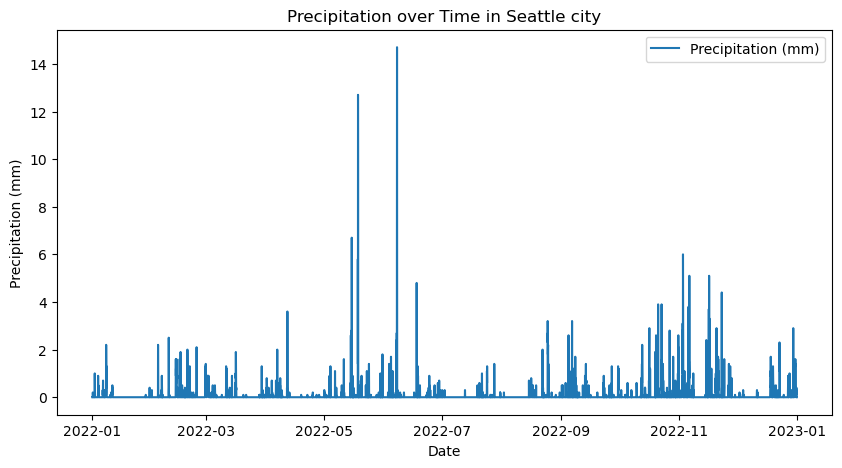

In [97]:
# Plot Precipitation Over Time
plt.figure(figsize =(10,5))
plt.plot(df_la.index, df_la['precipitation'], label= 'Precipitation (mm)')
plt.title("Precipitation over Time in Seattle city")
plt.xlabel("Date")
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [142]:
#  Resample Data to Monthly Averages
weekly_avg = df_la.resample('W').mean()
weekly_avg.head()

,precipitation
time,
2022-01-02,0.045833
2022-01-09,0.076786
2022-01-16,0.018452
2022-01-23,0.000000
2022-01-30,0.004762


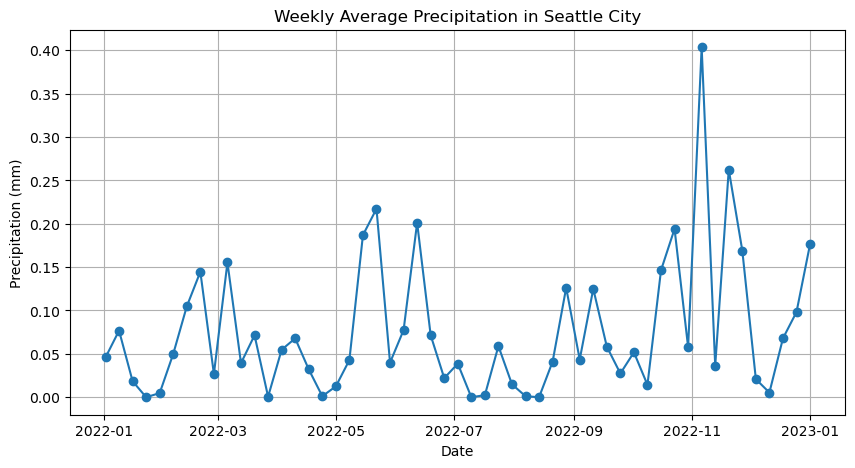

In [143]:
# Plot Weekly Average Precipitation
plt.figure(figsize=(10,5))
plt.plot(weekly_avg.index , weekly_avg['precipitation'], marker='o')
plt.title("Weekly Average Precipitation in Seattle City")
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.show()





In [144]:
# step 7 Combine DataFrames for Comparison
Combined_preci = pd.DataFrame({
    'Europe/London':weekly_avg['precipitation'], 
    'Los Angeles': weekly_avg['precipitation']
})

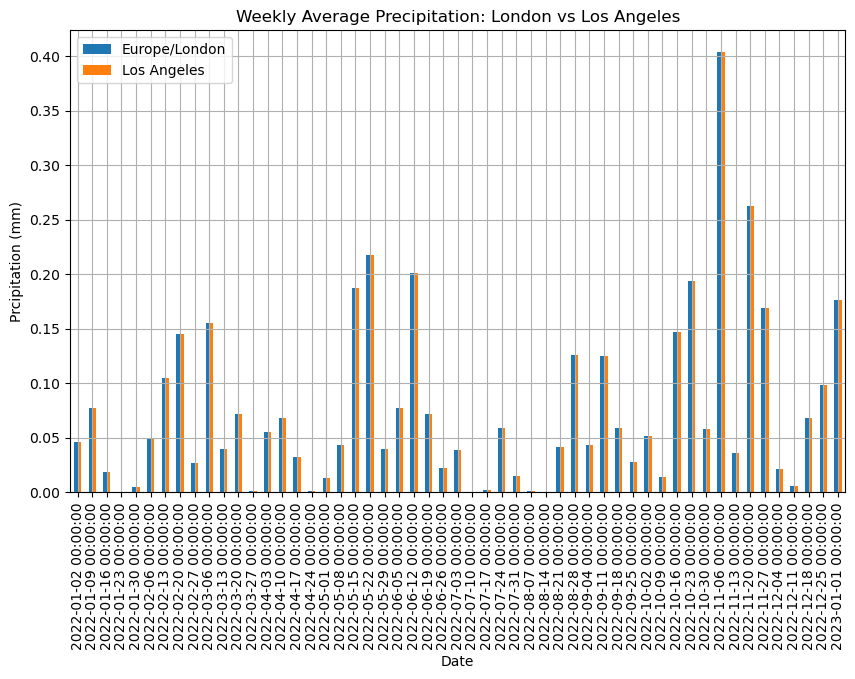

In [145]:
# step 8 Plot Comparison of weekly precipitation
Combined_preci.plot(kind='bar', figsize=(10, 6))
plt.title('Weekly Average Precipitation: London vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Prcipitation (mm)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [146]:
Combined_preci['precipitation_difference']= Combined_preci['Los Angeles'] - Combined_preci['Europe/London']
Combined_preci

,Europe/London,Los Angeles,precipitation_difference
time,,,
2022-01-02,0.045833,0.045833,0.0
2022-01-09,0.076786,0.076786,0.0
2022-01-16,0.018452,0.018452,0.0
2022-01-23,0.000000,0.000000,0.0
2022-01-30,0.004762,0.004762,0.0
2022-02-06,0.050000,0.050000,0.0
2022-02-13,0.104762,0.104762,0.0
2022-02-20,0.144643,0.144643,0.0
2022-02-27,0.026786,0.026786,0.0


In [149]:
# Step 9: Save Data to CSV (Optional)
df_lo.to_csv('Europe_London_weather_precipitation.csv')
df_la.to_csv('Los_Angeles_weather_precipitation.csv')

## Conclusion
* In this exercise, we:

    * Accessed and retrieved data from the Open-Meteo API.
    * Cleaned and preprocessed JSON data using pandas.
    * Performed exploratory data analysis and visualization.
    * Compared Precipitation patterns between Europe/London City and Los Angeles.